In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("day.csv")

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
data.shape

(730, 16)

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(730, 16)

In [9]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
# num_var=data.select_dtypes(include=['int64','float64'])

In [13]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
data = data.apply(lambda x : x.str.lower() if x.dtype == 'O' else x)


In [15]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [16]:
num_vars=pd.DataFrame(data,columns=['temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'])
cat_vars=pd.DataFrame(data,columns=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'])

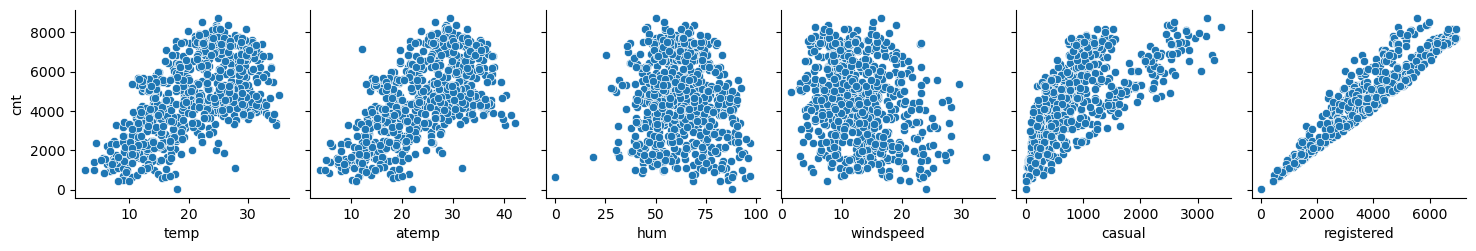

In [17]:
#Let's have a look at data
sns.pairplot(num_vars, x_vars=['temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'], y_vars='cnt')
plt.show()

In [18]:
num_vars.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

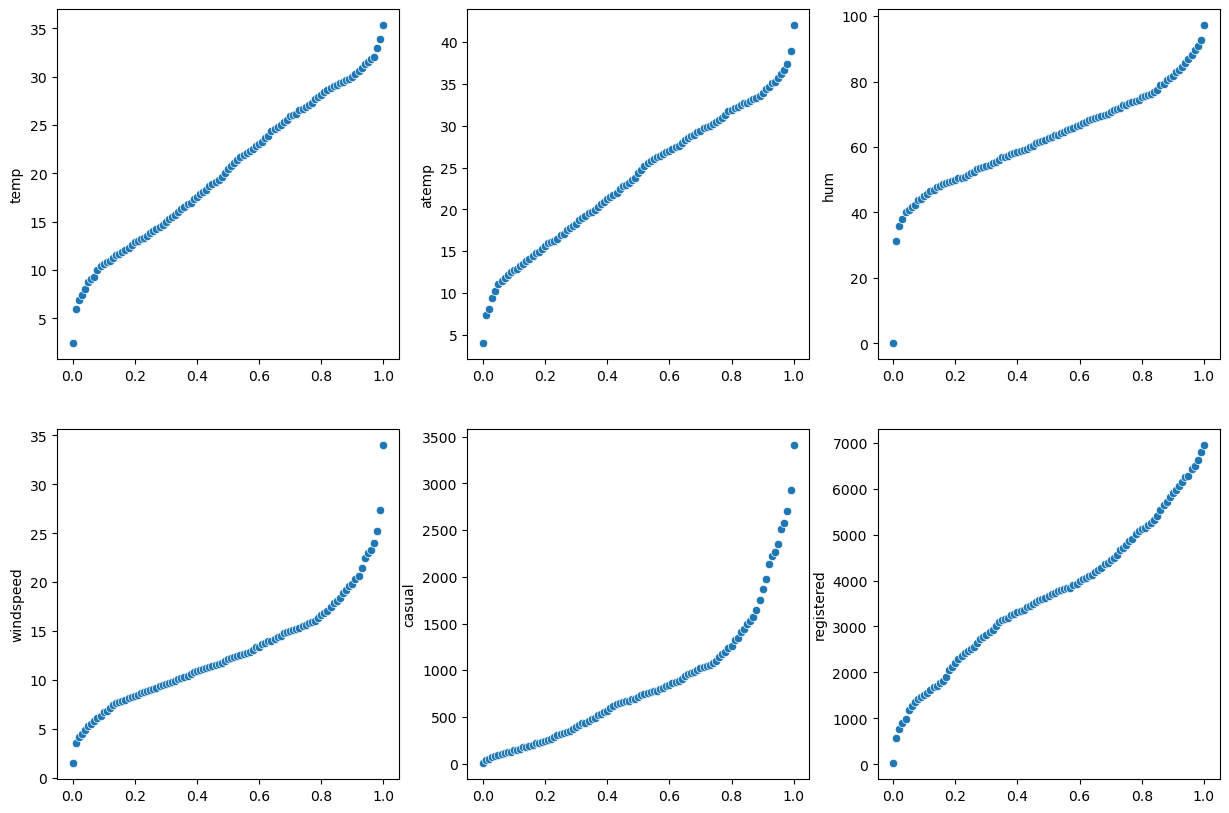

In [19]:
plt.figure(figsize=[15, 10])
plt.subplot(2, 3, 1)
sns.scatterplot(num_vars['temp'].quantile( np.arange(0, 1.01, 0.01) ))
plt.subplot(2, 3, 2)
sns.scatterplot(num_vars['atemp'].quantile( np.arange(0, 1.01, 0.01) ))
plt.subplot(2, 3, 3)
sns.scatterplot(num_vars['hum'].quantile( np.arange(0, 1.01, 0.01) ))
plt.subplot(2, 3, 4)
sns.scatterplot(num_vars['windspeed'].quantile( np.arange(0, 1.01, 0.01) ))
plt.subplot(2, 3, 5)
sns.scatterplot(num_vars['casual'].quantile( np.arange(0, 1.01, 0.01) ))
plt.subplot(2, 3, 6)
sns.scatterplot(num_vars['registered'].quantile( np.arange(0, 1.01, 0.01) ))
plt.show()

In [20]:
cat_vars.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [21]:
cat_vars.drop('dteday',inplace =True,axis=1)

season
3    25.753425
2    25.205479
1    24.657534
4    24.383562
Name: proportion, dtype: float64


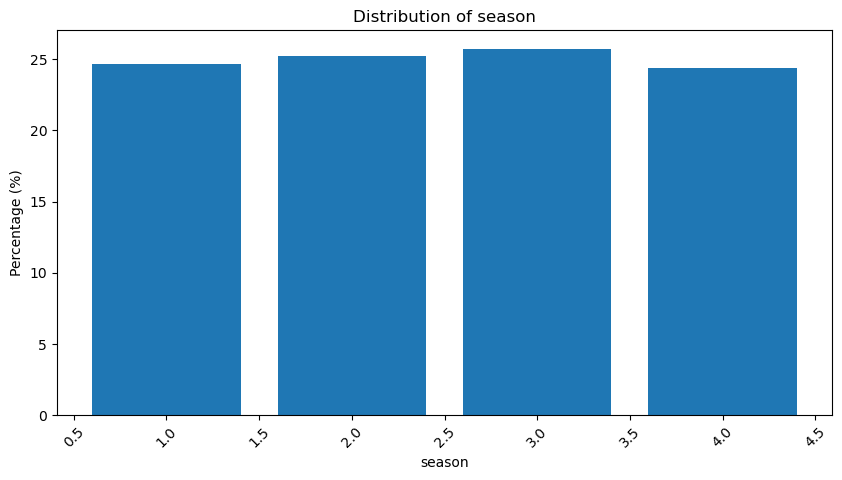

yr
0    50.0
1    50.0
Name: proportion, dtype: float64


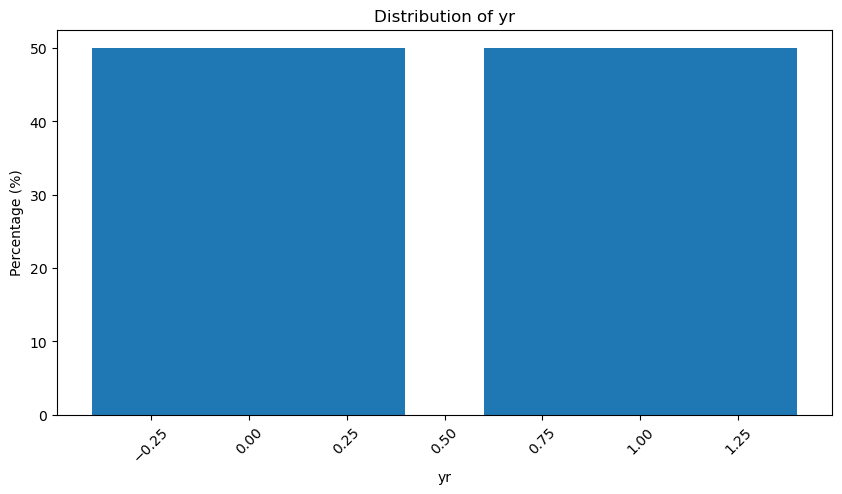

mnth
1     8.493151
3     8.493151
5     8.493151
7     8.493151
8     8.493151
10    8.493151
12    8.493151
4     8.219178
6     8.219178
9     8.219178
11    8.219178
2     7.671233
Name: proportion, dtype: float64


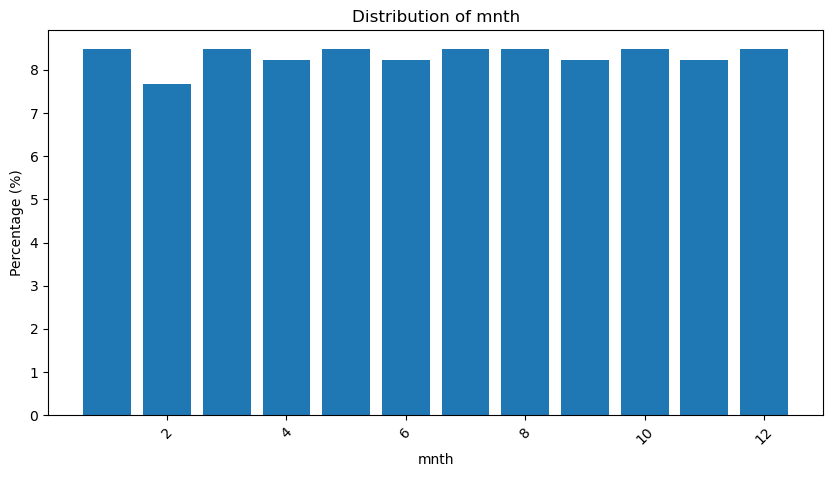

holiday
0    97.123288
1     2.876712
Name: proportion, dtype: float64


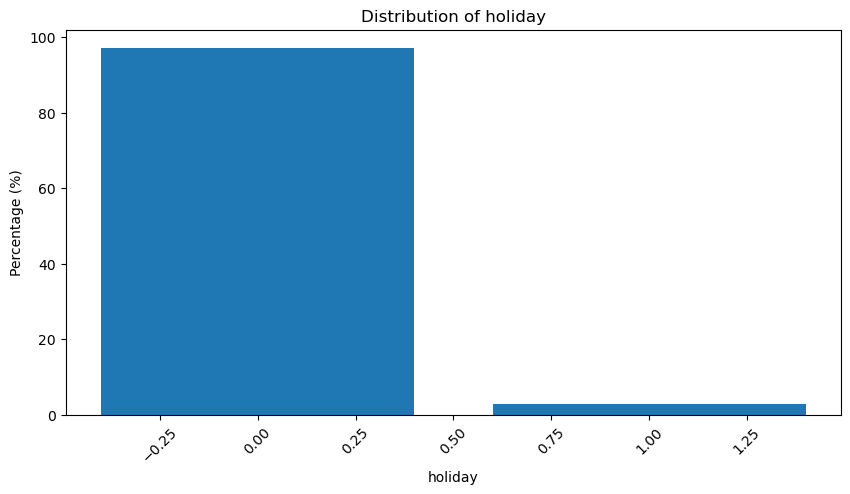

weekday
1    14.383562
2    14.383562
3    14.246575
4    14.246575
5    14.246575
6    14.246575
0    14.246575
Name: proportion, dtype: float64


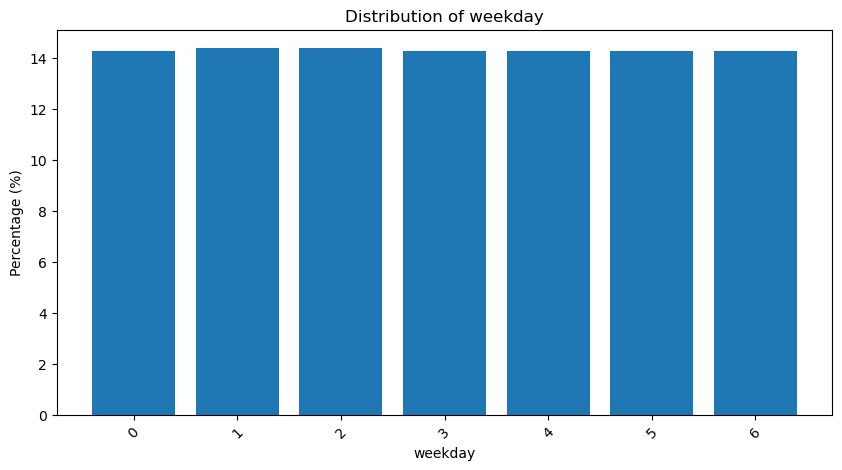

workingday
1    69.041096
0    30.958904
Name: proportion, dtype: float64


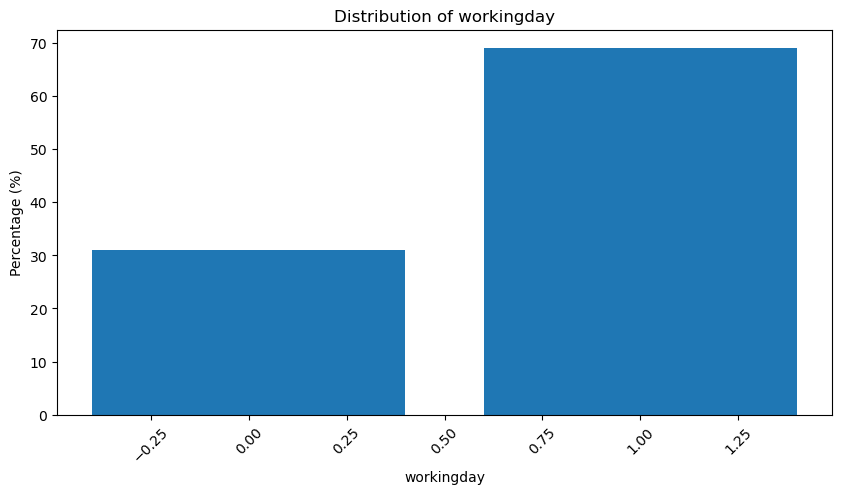

weathersit
1    63.424658
2    33.698630
3     2.876712
Name: proportion, dtype: float64


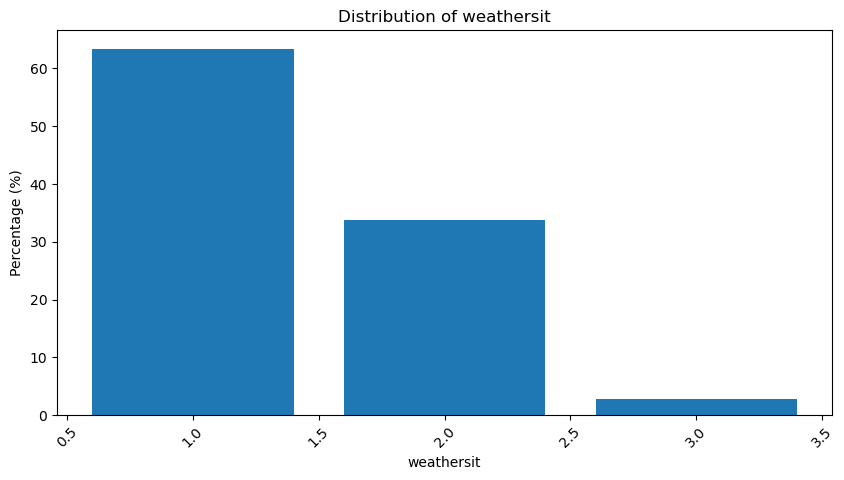

In [22]:
import matplotlib.pyplot as plt

for i in cat_vars.columns:
    value_counts = cat_vars[i].value_counts(normalize=True) * 100
    print(value_counts)

    plt.figure(figsize=(10, 5))
    plt.bar(x=value_counts.index, height=value_counts.values)
    plt.xlabel(i)
    plt.ylabel('Percentage (%)')
    plt.title(f'Distribution of {i}')
    plt.xticks(rotation=45)
    plt.show()


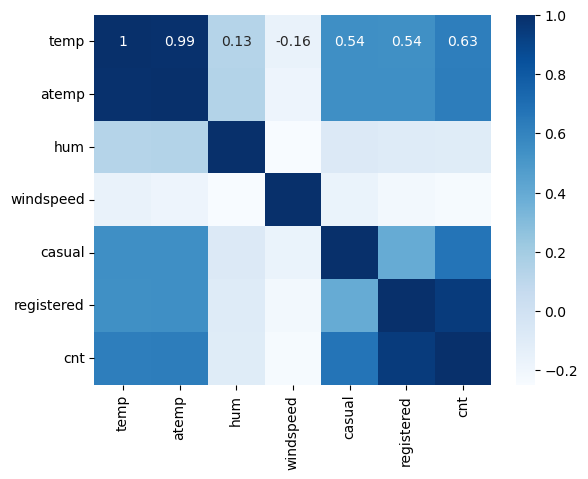

In [23]:
# data=data.drop('dteday',axis=1)
corrmat= num_vars.corr()
sns.heatmap(corrmat,cmap='Blues',annot=True)
plt.show()

let's take cnt as a target variable
Their is a strong relation between the temperature(temp),casual and  cnt.

In [24]:
num_vars.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [25]:
cat_vars = pd.get_dummies(cat_vars, drop_first=True, dtype=int)

cat_vars

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,1,1,2
1,1,0,1,0,2,1,2
2,1,0,1,0,3,1,1
3,1,0,1,0,4,1,1
4,1,0,1,0,5,1,1
...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2
726,1,1,12,0,6,0,2
727,1,1,12,0,0,0,2
728,1,1,12,0,1,1,1


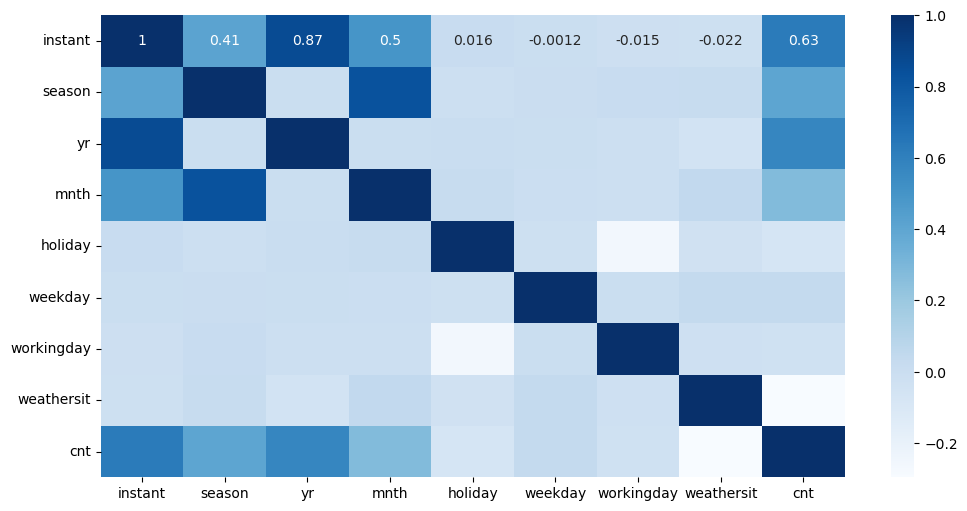

In [26]:
cat_var=data.drop(['dteday','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'],axis=1)
corrmat= cat_var.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corrmat,cmap='Blues',annot=True)
plt.show()

Their is a relation between the season and month(mnt)

In [27]:
data = pd.concat([num_vars, cat_vars], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
 7   season      730 non-null    int64  
 8   yr          730 non-null    int64  
 9   mnth        730 non-null    int64  
 10  holiday     730 non-null    int64  
 11  weekday     730 non-null    int64  
 12  workingday  730 non-null    int64  
 13  weathersit  730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


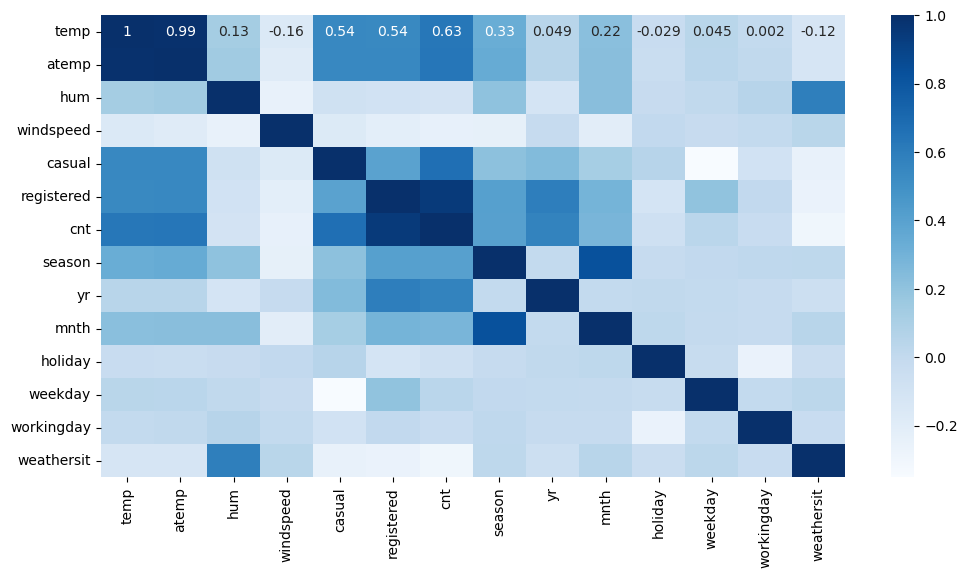

In [28]:
corrmat= data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corrmat,cmap='Blues',annot=True)
plt.show()

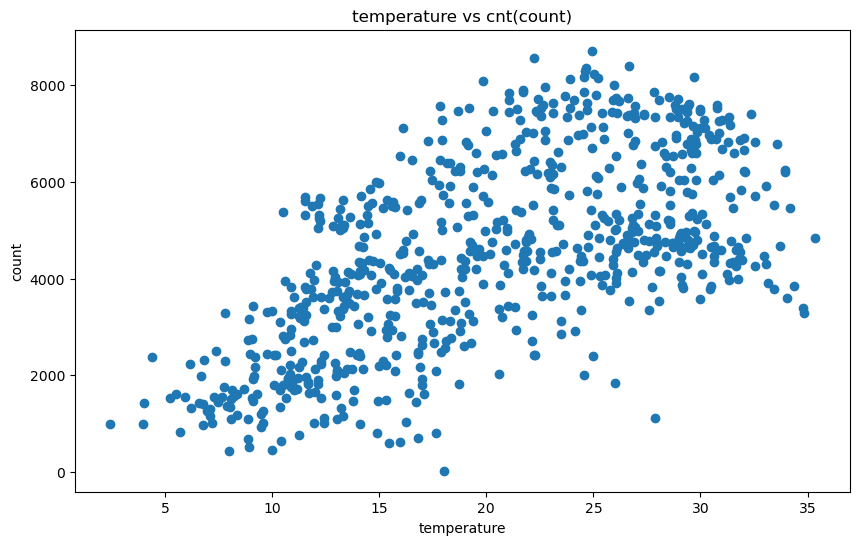

In [29]:
# plot between the temp,and cnt
plt.figure(figsize=(10,6))
plt.scatter(x=data['temp'],y=data['cnt'])
plt.xlabel('temperature')
plt.ylabel('count')
plt.title('temperature vs cnt(count)')
plt.show()

As the temperature increases the count also increases.


In [30]:
data.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000


In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()

data[data.columns] = scaler.fit_transform(data[data.columns])

data.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.543852,0.519090,0.645400,0.346568,0.248606,0.525376,0.516108,0.499543,0.500000,0.502366,0.028767,0.499315,0.690411,0.197260
std,0.228140,0.213968,0.146402,0.159873,0.201432,0.225203,0.222735,0.370061,0.500343,0.313656,0.167266,0.333390,0.462641,0.272404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346084,0.339611,0.534704,0.232045,0.092210,0.358396,0.362143,0.333333,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000
50%,0.548307,0.535942,0.643959,0.326928,0.209800,0.526206,0.520766,0.666667,0.500000,0.545455,0.000000,0.500000,1.000000,0.000000
75%,0.743261,0.695494,0.750535,0.434629,0.321156,0.687735,0.683847,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X=data.drop(['cnt','atemp','windspeed','casual'],axis=1)
y=data['cnt']

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [34]:

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(547, 10) (183, 10) (547,) (183,)


In [35]:
X_train_lm=X_train

In [36]:
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lrm = sm.OLS(Y_train, X_train_lm).fit()

# Check the stats obtained
lrm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     913.6
Date:                Sat, 31 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:36:41   Log-Likelihood:                 831.45
No. Observations:                 547   AIC:                            -1641.
Df Residuals:                     536   BIC:                            -1594.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0514      0.014      3.791      0.000       0.025       0.078
temp           0.1770      0.014     12.759      0.000       0.150       0.204
hum           -0.0137      0.021     -0.662      0.508      -0.054       0.027
registered     0.8042      0.021     38.811      0.000       0.763       0.845
season         0.0194      0.012      1.603      0.110      -0.004       0.043
yr             0.0251      0.007      3.553      0.000       0.011       0.039
mnth          -0.0146      0.013     -1.108      0.268      -0.040       0.011
holiday       -0.0005      0.015     -0.030      0.976      -0.030       0.029
weekday       -0.0879      0.008    -11.603      0.000      -0.103      -0.073
workingday    -0.0122      0.005     -2.293      0.022      -0.023      -0.002
weathersit    -0.0427      0.011     -3.823      0.000      -0.065      -0.021
==============================================================================
Omnibus:                       83.331   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.416
Skew:                           0.938   Prob(JB):                     5.32e-31
Kurtosis:                       4.611   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Model achieved great fit as R-squared shows.
- All variables showing high significance.
- Let's check for collinearity.

In [37]:
lm=LinearRegression()
lm.fit(X_train_lm,Y_train)

LinearRegression()

In [38]:
y_train_pred = lm.predict(X_train_lm)
y_train_pred

array([0.49587284, 0.83511921, 0.36724971, 0.43667144, 0.52721025,
       0.63381549, 0.56706309, 0.48516167, 0.2891121 , 0.26978187,
       0.48084341, 0.51256564, 0.22387811, 0.15495433, 0.48681882,
       0.3724351 , 0.29785578, 0.14311779, 0.47838724, 0.10125826,
       0.34319028, 0.37178232, 0.8680241 , 0.850052  , 0.40783189,
       0.2268142 , 0.68940937, 0.1931964 , 0.75135983, 0.50687451,
       0.84409908, 0.35120468, 0.80752136, 0.44377178, 0.90501875,
       0.23782578, 0.87565729, 0.88288276, 0.48088672, 0.23562456,
       0.47845309, 0.25604258, 0.75123795, 0.86906165, 0.73531956,
       0.53245373, 0.5287977 , 0.87471089, 0.4397471 , 0.73014416,
       0.59596121, 0.87725132, 0.53480195, 0.54626653, 0.58359721,
       0.48410422, 0.53769943, 0.65488774, 0.84981457, 0.64257017,
       0.3385169 , 0.82701971, 0.45714283, 0.85551124, 0.77296518,
       0.57865555, 0.4128561 , 0.49037028, 0.41360878, 0.44579901,
       0.66099927, 0.51243277, 0.13696629, 0.54502503, 0.81600